In [29]:
# import all packages
import cv2 as cv
import sys
import numpy as np
from matplotlib import pyplot as plt

In [10]:
# implement distance metric - e.g. squared distances between pixels
def distance(a, b):
    
    # calculate the distrance and then return
    return np.linalg.norm(a - b)

In [99]:
def update_mean(img, clustermask):
    
    new_means = []
    
    # calculate the clustered mean
    for cluster_id in range(numclusters):
        cluster_pixels = img[clustermask == cluster_id]
        
        if len(cluster_pixels) > 0:
            new_mean = np.mean(cluster_pixels, axis=0)
            new_means.append(new_mean)
    
    return np.array(new_means)

In [100]:
def assign_to_current_mean(img, result, clustermask):
    
    overall_dist = 0
    
    for i in range(h1):
        for j in range(w1):
            min_distance = sys.float_info.max
            min_cluster = -1
            for cluster_id, cluster_color in enumerate(current_cluster_centers):
                dist = distance(img[i, j], cluster_color)
                if dist < min_distance:
                    min_distance = dist
                    min_cluster = cluster_id
                    
            clustermask[i, j] = min_cluster
            result[i, j] = current_cluster_centers[min_cluster]
            overall_dist += min_distance
    return overall_dist

In [101]:
def initialize(img, numclusters):
    pixels = img.reshape(-1, 3)
    indices = np.random.choice(len(pixels), numclusters, replace=False)
    selected_pixels = pixels[indices]
    current_cluster_centers[:, 0, :] = selected_pixels

In [102]:
def kmeans(img, numclusters):
    
    max_iter = 10
    max_change_rate = 0.02
    dist = sys.float_info.max

    h1, w1 = img.shape[:2]

    clustermask = np.zeros((h1, w1), np.uint8)
    result = np.zeros((h1, w1, 3), np.uint8)

    initialize(img, numclusters)

    for iteration in range(max_iter):
        prev_dist = dist
        dist = assign_to_current_mean(img, result, clustermask)
        current_cluster_centers = update_mean(img, clustermask)
        change_rate = abs(dist - prev_dist) / prev_dist

        if change_rate < max_change_rate:
            break

    return result

In [103]:
# num of clusters
clusters = [8, 16, 32, 64] 

# load image
imgraw = cv.imread('../resources/lfi-01/graffiti.png')

# convert to RGB
imgraw = cv.cvtColor(imgraw, cv.COLOR_BGR2RGB)

scaling_factor = 0.5
imgraw = cv.resize(imgraw, None, fx=scaling_factor, fy=scaling_factor, interpolation=cv.INTER_AREA)

# all resulting cluster
res_img = []

for k in clusters:
    current_cluster_centers = np.zeros((k, 1, 3), np.float32)
    image = imgraw.copy()
    res = kmeans(image, k)
    
    res_img.append(res)

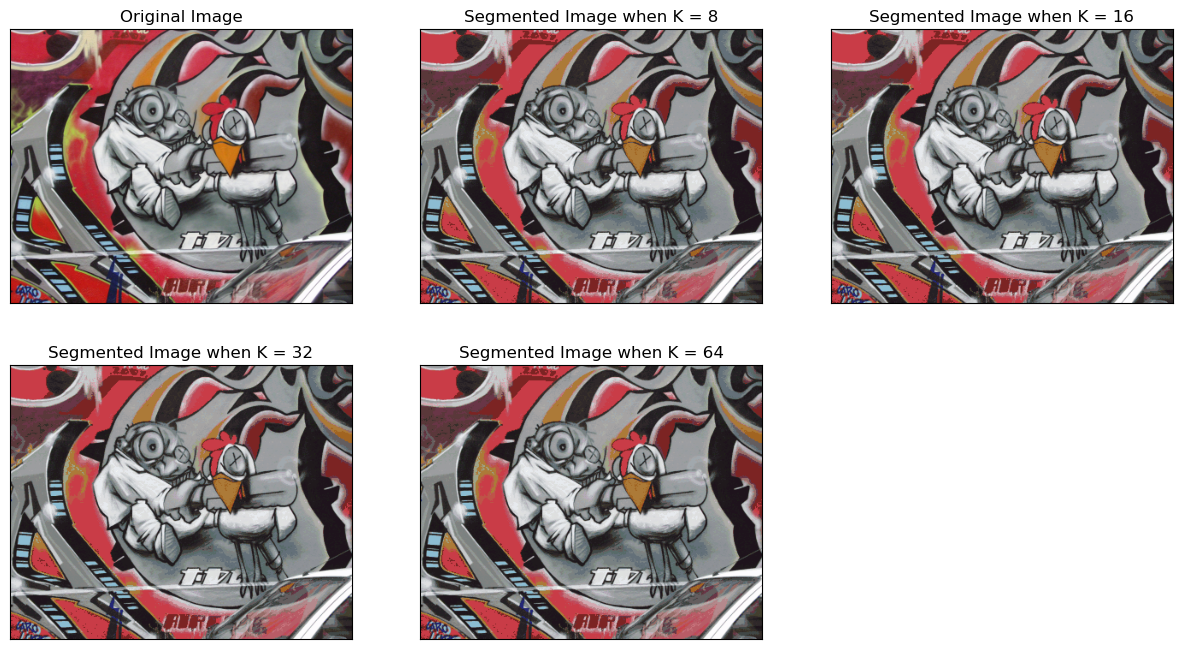

In [104]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1),plt.imshow(imgraw)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

for K in clusters:
    print()
    plt.subplot(2, 3, clusters.index(K)+2)
    plt.imshow(res_img[clusters.index(k)])
    plt.title(f'Segmented Image when K = {K}')
    plt.xticks([]), plt.yticks([])